In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch
from PIL import Image
from IPython.display import display
from flux_reconstructor import Flux_Reconstructor

2024-10-24 21:57:58.578 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/export/raid1/home/kneel027/mamba/envs/flux/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda"
feature_extractor = Flux_Reconstructor(offload=False, embedder_only=True, device=device)
# reconstructor.set_lora(None, "XLabs-AI/flux-RealismLora", "lora.safetensors", 1)
# recon_path = "/export/raid1/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/vision/subj01_40sess_hypatia_ridge_sc_flux_enhanced/subject1/"
# sc_recon_path = "/export/raid1/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/vision/subj01_40sess_hypatia_ridge_sc_flux/subject1/"
# t5_preds = torch.load(recon_path + "flux_t5_text_voxels.pt")
# clip_text_preds = torch.load(recon_path + "flux_clip_text_voxels.pt")

Flux Reconstructor: Loading model...


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Init AE


torch.Size([1, 16, 128, 128])
Flux Reconstructor: Loading model...
Init model
Loading checkpoint
Init AE


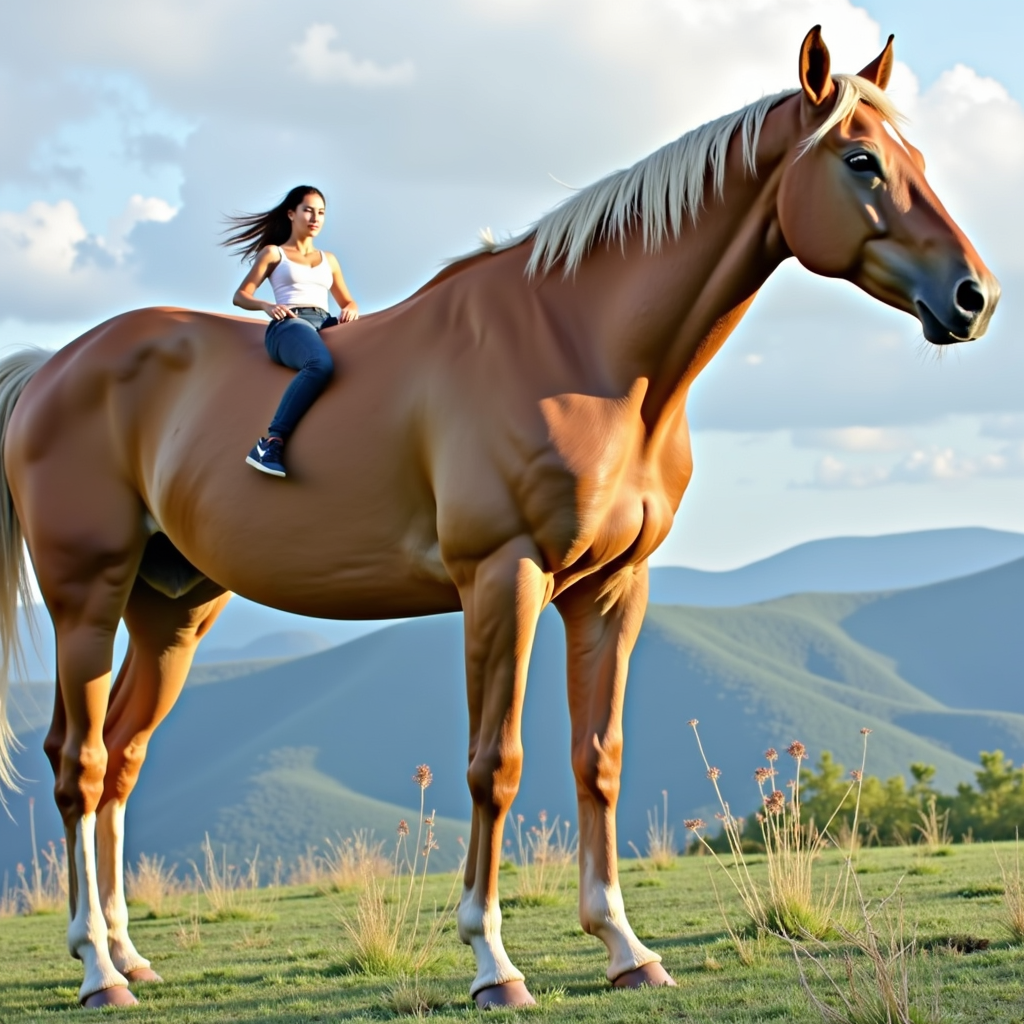

In [3]:

# index = 6
# t5_pred = t5_preds[index]
# clip_text_pred = clip_text_preds[index]
prompt = "a woman riding a horse"
# image = Image.open(f"{sc_recon_path}/{index}/5.png")
clip_text_pred, t5_pred = feature_extractor.embed_text(prompt)
print(clip_text_pred.dtype, t5_pred.dtype)
# image_embed = recon.embed_image(image)
image = Image.open("/home/naxos2-raid25/kneel027/home/kneel027/IP-Adapter_MEI/assets/images/horse.jpg")
latent_embed = feature_extractor.embed_latent(image)
print(latent_embed.shape)
# print(torch.mean(image_embed), torch.mean(prompt_embed), torch.sum(image_embed), torch.sum(prompt_embed))
# print(prompt_embed.shape, image_embed.shape, latent_embed.shape)
# url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
# init_image = load_image(url).resize((1024, 1024))
del feature_extractor
reconstructor = Flux_Reconstructor(offload=True, device=device)
images = reconstructor.reconstruct(latent=latent_embed, c_t=clip_text_pred, t5=t5_pred, strength=0.8, num_steps=50, n_samples=1, cfg=3.5)
# show_images(sample)
# display(images[0])
# display(images[1])
display(images)